In [1]:
import pandas as pd
import kagglehub
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

In [2]:
path = kagglehub.dataset_download('nikhil1e9/loan-default') + '/Loan_default.csv'
default = pd.read_csv(path)

In [3]:
default.head(10)

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0
5,A9S62RQ7US,25,90298,90448,720,18,2,22.72,24,0.10,High School,Unemployed,Single,Yes,No,Business,Yes,1
6,H8GXPAOS71,38,111188,177025,429,80,1,19.11,12,0.16,Bachelor's,Unemployed,Single,Yes,No,Home,Yes,0
7,0HGZQKJ36W,56,126802,155511,531,67,4,8.15,60,0.43,PhD,Full-time,Married,No,No,Home,Yes,0
8,1R0N3LGNRJ,36,42053,92357,827,83,1,23.94,48,0.20,Bachelor's,Self-employed,Divorced,Yes,No,Education,No,1
9,CM9L1GTT2P,40,132784,228510,480,114,4,9.09,48,0.33,High School,Self-employed,Married,Yes,No,Other,Yes,0


In [4]:
numerical_features = ['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio']
default[numerical_features].describe().round(1)

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio
count,255347.0,255347.0,255347.0,255347.0,255347.0,255347.0,255347.0,255347.0,255347.0
mean,43.5,82499.3,127578.9,574.3,59.5,2.5,13.5,36.0,0.5
std,15.0,38963.0,70840.7,158.9,34.6,1.1,6.6,17.0,0.2
min,18.0,15000.0,5000.0,300.0,0.0,1.0,2.0,12.0,0.1
25%,31.0,48825.5,66156.0,437.0,30.0,2.0,7.8,24.0,0.3
50%,43.0,82466.0,127556.0,574.0,60.0,2.0,13.5,36.0,0.5
75%,56.0,116219.0,188985.0,712.0,90.0,3.0,19.2,48.0,0.7
max,69.0,149999.0,249999.0,849.0,119.0,4.0,25.0,60.0,0.9


Text(0.5, 1.0, 'Correlation Matrix of Numerical Features')

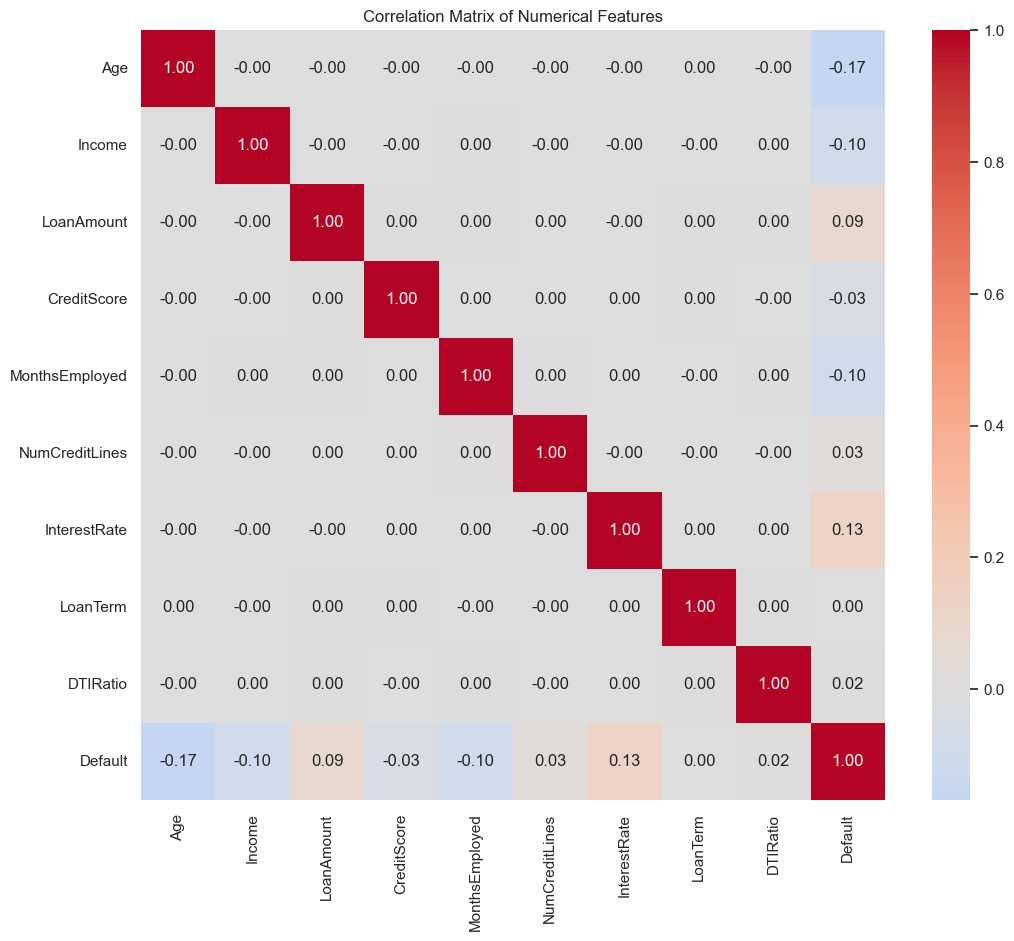

In [5]:
corr_matrix = default[numerical_features + ['Default']].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, 
            annot=True,
            cmap='coolwarm',
            center=0,
            fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')

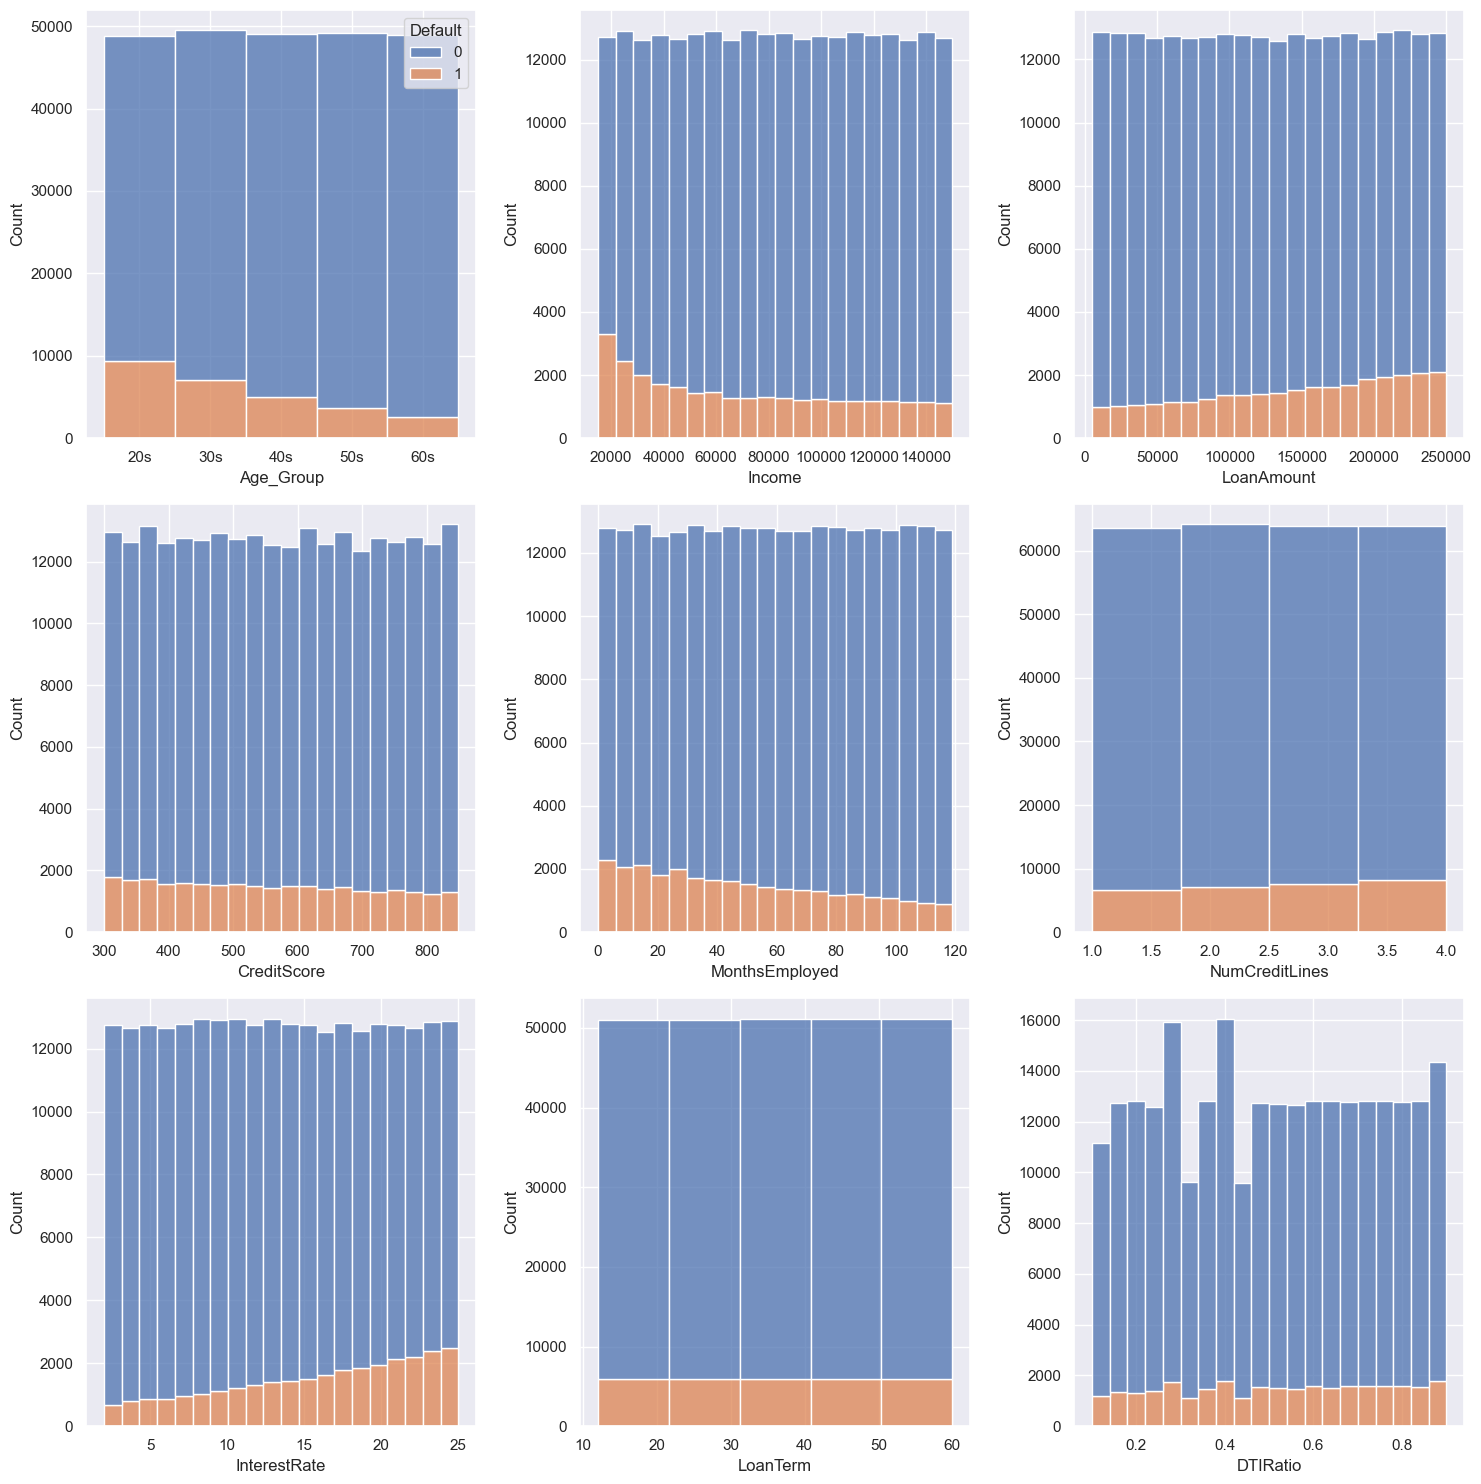

In [6]:
bins = [20, 30, 40, 50, 60, 70, 80]
labels = ['20s', '30s', '40s', '50s', '60s', '70s']
default['Age_Group'] = pd.cut(default['Age'], bins=bins, labels=labels, right=False)

f, axs = plt.subplots(3, 3, figsize=(15, 15))
sns.histplot(data=default, x='Age_Group', hue='Default', multiple='stack', ax=axs[0, 0], legend=True)
sns.histplot(data=default, x='Income', bins=20, hue='Default', multiple='stack', ax=axs[0, 1], legend=False)
sns.histplot(data=default, x='LoanAmount', bins=20, hue='Default', multiple='stack', ax=axs[0, 2], legend=False)
sns.histplot(data=default, x='CreditScore', bins=20, hue='Default', multiple='stack', ax=axs[1, 0], legend=False)
sns.histplot(data=default, x='MonthsEmployed', bins=20, hue='Default', multiple='stack', ax=axs[1, 1], legend=False)
sns.histplot(data=default, x='NumCreditLines', bins=4, hue='Default', multiple='stack', ax=axs[1, 2], legend=False)
sns.histplot(data=default, x='InterestRate', bins=20, hue='Default', multiple='stack', ax=axs[2, 0], legend=False)
sns.histplot(data=default, x='LoanTerm', bins=5, hue='Default', multiple='stack', ax=axs[2, 1], legend=False)
sns.histplot(data=default, x='DTIRatio', bins=20, hue='Default', multiple='stack', ax=axs[2, 2], legend=False)

plt.tight_layout()


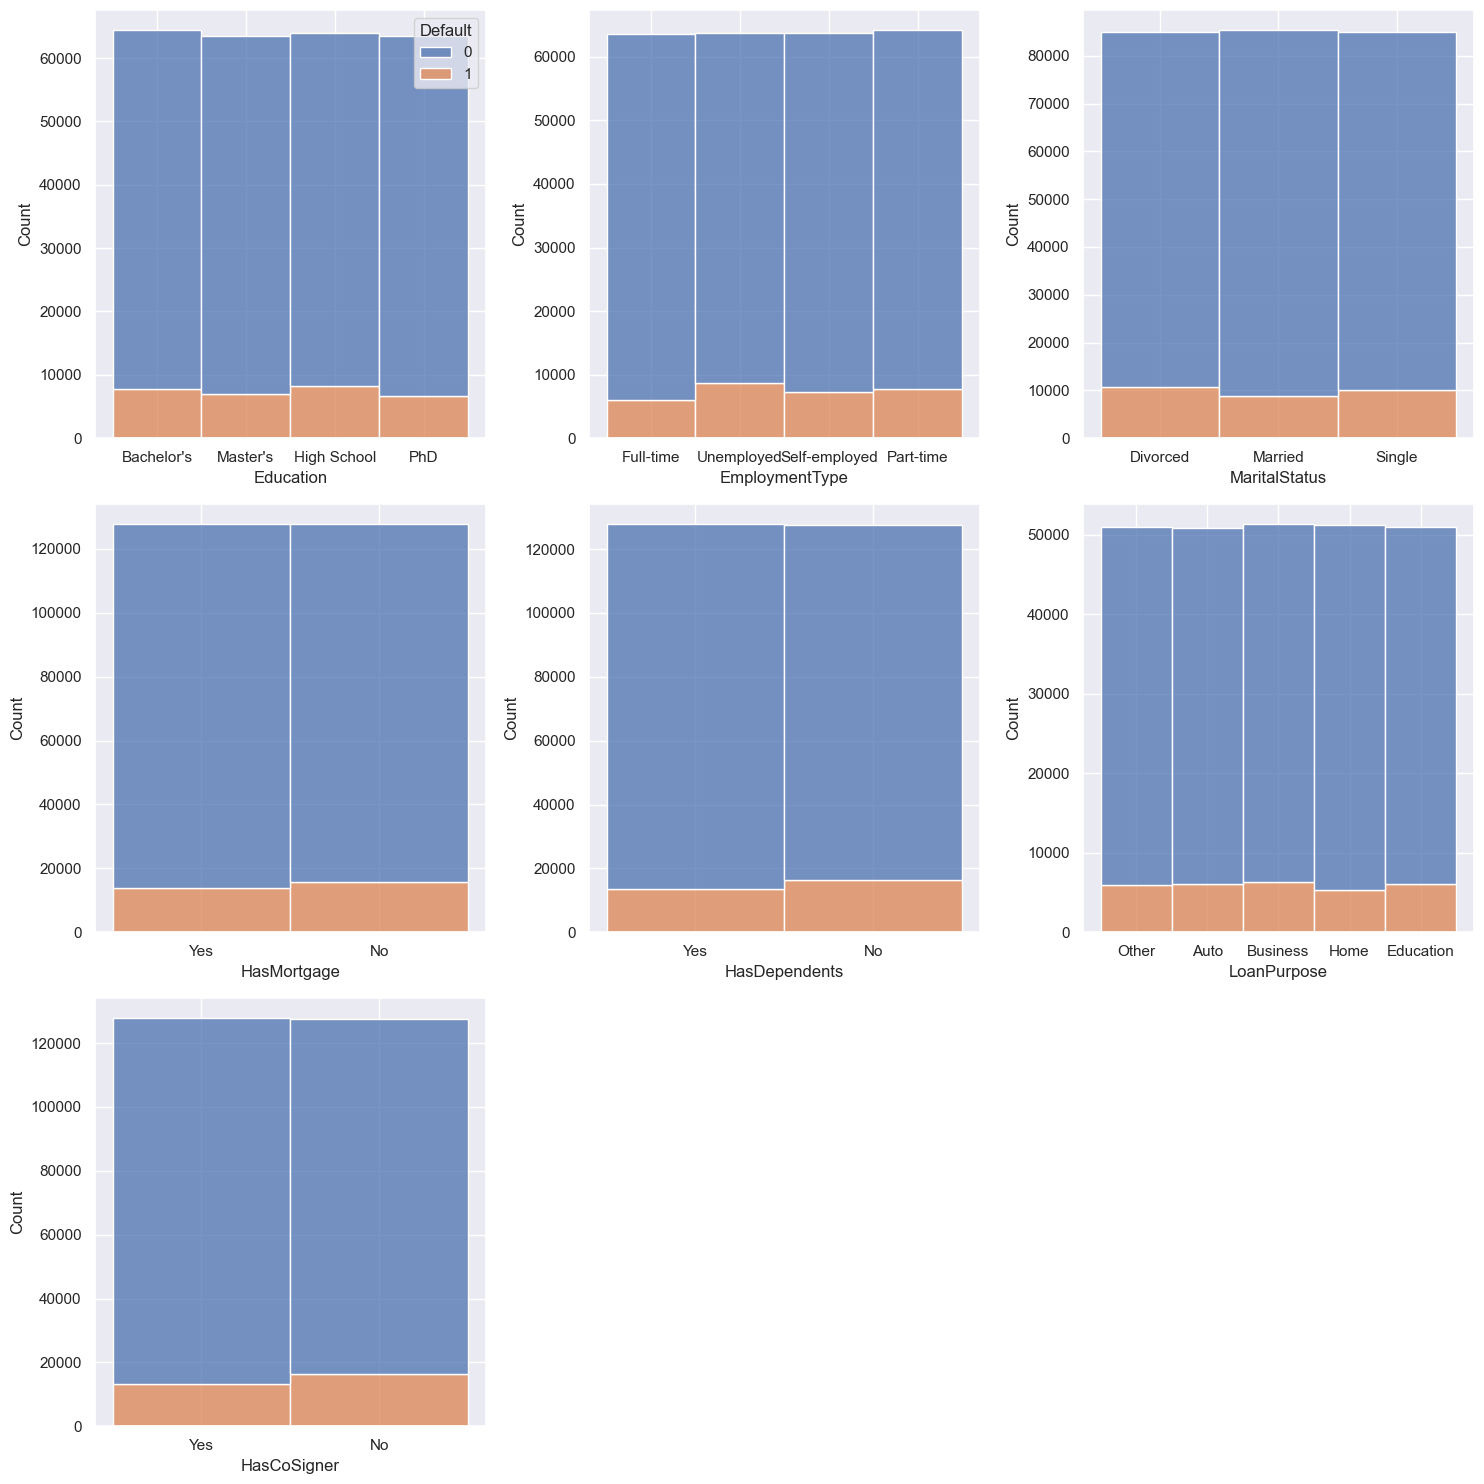

In [7]:
f, axs = plt.subplots(3, 3, figsize=(15, 15))

sns.histplot(data=default, x='Education', hue='Default', multiple='stack', ax=axs[0, 0], legend=True)
sns.histplot(data=default, x='EmploymentType', hue='Default', multiple='stack', ax=axs[0, 1], legend=False)
sns.histplot(data=default, x='MaritalStatus', hue='Default', multiple='stack', ax=axs[0, 2], legend=False)
sns.histplot(data=default, x='HasMortgage', hue='Default', multiple='stack', ax=axs[1, 0], legend=False)
sns.histplot(data=default, x='HasDependents', hue='Default', multiple='stack', ax=axs[1, 1], legend=False)
sns.histplot(data=default, x='LoanPurpose', hue='Default', multiple='stack', ax=axs[1, 2], legend=False)
sns.histplot(data=default, x='HasCoSigner', hue='Default', multiple='stack', ax=axs[2, 0], legend=False)

axs[2, 1].remove()
axs[2, 2].remove()

plt.tight_layout()

In [8]:
from sklearn.model_selection import train_test_split

selected_features = ['Age', 'Income', 'LoanAmount', 'MonthsEmployed', 'InterestRate']
selected_default = default[selected_features + ['Default']].copy()

X = selected_default.drop(columns=['Default'])
y = selected_default[['Default']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=42)

In [9]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(bootstrap=True, max_features='sqrt', random_state=42).fit(X_train,y_train.values.ravel())
y_test['Default_RF'] = model.predict(X_test)

In [10]:
from sklearn.metrics import confusion_matrix

TN, FP, FN, TP = confusion_matrix(y_test['Default'], y_test['Default_RF']).ravel()

Accuracy = (TN + TP)/(TN + TP + FN + FP)
Precision = TP / (TP + FP)
Recall = TP / (TP + FN)
F1_Score = 2 * (Precision * Recall) / (Precision + Recall)

print(f'True Negative   : {TN}')
print(f'True Positive   : {TP}')
print(f'False Negative  : {FN}')
print(f'False Positive: : {FP}')
print()
print(f'Accuracy        : {Accuracy:.3f}')
print(f'Precision       : {Precision:.3f}')
print(f'Recall          : {Recall:.3f}')
print(f'F1_Score        : {F1_Score:.3f}')

True Negative   : 22375
True Positive   : 216
False Negative  : 2749
False Positive: : 195

Accuracy        : 0.885
Precision       : 0.526
Recall          : 0.073
F1_Score        : 0.128


In [11]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=10000).fit(X_train, y_train.values.ravel())
y_test['Default_LR'] = model.predict(X_test)

In [12]:
TN, FP, FN, TP = confusion_matrix(y_test['Default'], y_test['Default_LR']).ravel()

Accuracy = (TN + TP)/(TN + TP + FN + FP)
Precision = TP / (TP + FP)
Recall = TP / (TP + FN)
F1_Score = 2 * (Precision * Recall) / (Precision + Recall)

print(f'True Negative   : {TN}')
print(f'True Positive   : {TP}')
print(f'False Negative  : {FN}')
print(f'False Positive: : {FP}')
print()
print(f'Accuracy        : {Accuracy:.3f}')
print(f'Precision       : {Precision:.3f}')
print(f'Recall          : {Recall:.3f}')
print(f'F1_Score        : {F1_Score:.3f}')

True Negative   : 22541
True Positive   : 47
False Negative  : 2918
False Positive: : 29

Accuracy        : 0.885
Precision       : 0.618
Recall          : 0.016
F1_Score        : 0.031


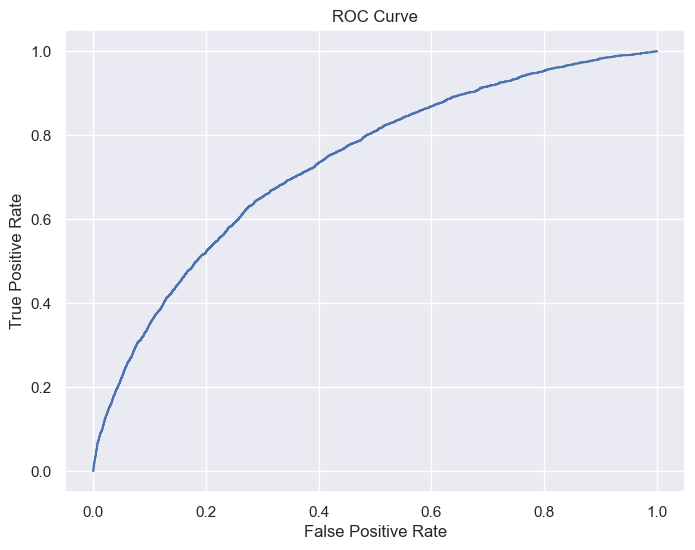

In [13]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test['Default'], model.predict_proba(X_test)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate') # FPR = FP / (FP + TN)
plt.ylabel('True Positive Rate') # TPR = TP / (TP + FN)
plt.title('ROC Curve')
plt.show()